In [59]:
import pandas as pd 
import numpy as np

In [60]:
df=pd.read_csv('diabetes.csv')

In [61]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())


In [65]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

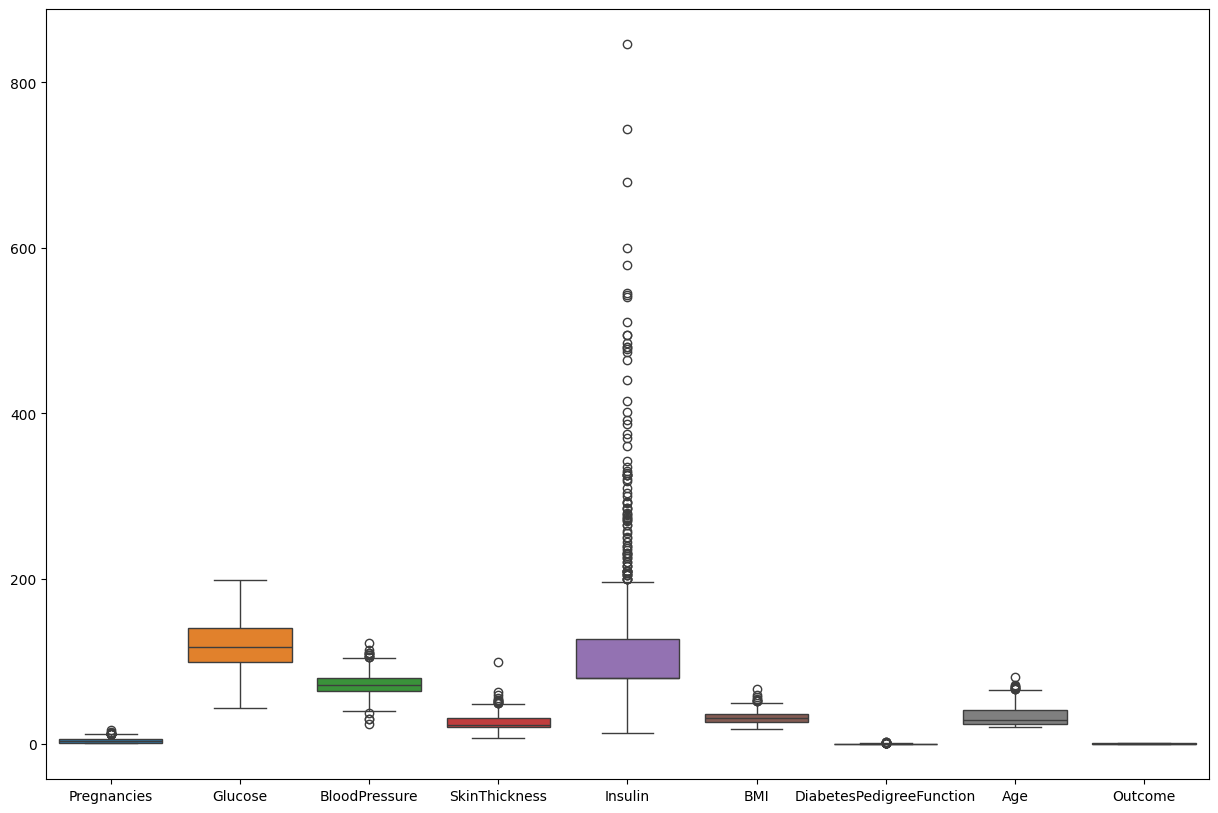

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15,10))
sns.boxplot(data=df)


In [67]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [70]:
x_train=scaler.fit_transform(x_train)

In [71]:
x_test=scaler.transform(x_test)

In [72]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()

In [73]:
logit.fit(x_train,y_train)

LogisticRegression()

In [74]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameters={'penalty':['l1','l2']
            ,'C': np.logspace(-3,3,7)
            ,'solver':['newton-cg','lbfgs','liblinear']
            ,}

In [75]:
parameters

{'penalty': ['l1', 'l2'],
 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [76]:
clf=GridSearchCV(logit,param_grid=parameters,scoring='accuracy',cv=10)

In [77]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [78]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [79]:
clf.best_score_

0.7621099947117926

In [80]:
y_pred=clf.predict(x_test)

In [81]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[98  9]
 [19 28]]
0.8181818181818182
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [83]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(logit,open('logit.pkl','wb'))